In [72]:
from sklearn.cluster import k_means
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
cdmx_tourist = gpd.read_file("Viaje CDMX- Atracciones.csv")
cdmx_tourist['type'] = 'tourist'

cdmx_restaurants = gpd.read_file("Viaje CDMX- Restaurantes.csv")
cdmx_restaurants['type'] = 'restaurant'

cdmx_travel = gpd.read_file("Viaje CDMX- Viaje.csv")
cdmx_travel['type'] = 'travel'

cdmx_points = pd.concat([cdmx_tourist, cdmx_restaurants, cdmx_travel])

In [74]:
display(cdmx_points.head())

,WKT,name,description,geometry,type
0,POINT (-99.1862786 19.4260032),Museo Nacional de Antropología,,POINT (-99.18628 19.42600),tourist
1,POINT (-99.181935 19.4204397),Chapultepec Castle,,POINT (-99.18193 19.42044),tourist
2,POINT (-99.1412 19.4352),Palacio de Bellas Artes,,POINT (-99.14120 19.43520),tourist
3,POINT (-99.11241389999999 19.2576998),Xochimilco,,POINT (-99.11241 19.25770),tourist
4,POINT (-98.8458546 19.69062509999999),Pyramids of Teotihuacan,,POINT (-98.84585 19.69063),tourist


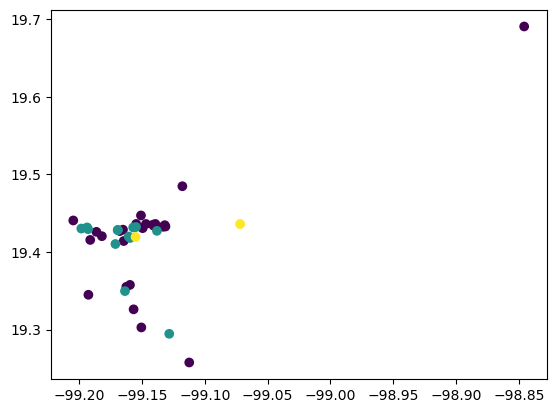

In [75]:
plt.scatter(
    cdmx_points['geometry'].x, 
    cdmx_points['geometry'].y, 
    c=cdmx_points['type'].apply(lambda x: 1 if x == 'tourist' else 2 if x == 'restaurant' else 3), 
    cmap='viridis')

In [85]:
df = cdmx_tourist

In [86]:
features = df['geometry'].apply(lambda x: [x.x, x.y]).to_list()
kmeans = k_means(features, n_clusters=4, init= 'k-means++')

c:\Users\rcorr\miniconda3\envs\python-course\lib\site-packages\geopandas\geoseries.py:574: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
c:\Users\rcorr\miniconda3\envs\python-course\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rcorr\miniconda3\envs\python-course\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [87]:
display(kmeans[0])
df['cluster'] = kmeans[1]

array([[-99.180211  ,  19.42468323],
       [-98.8458546 ,  19.6906251 ],
       [-99.1557201 ,  19.32408768],
       [-99.13979514,  19.4395604 ]])

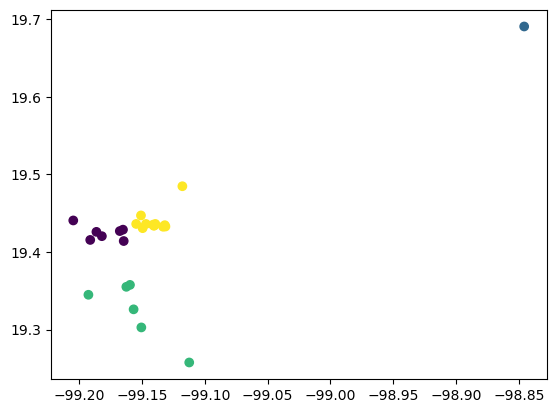

In [88]:
plt.scatter(
    df['geometry'].x, 
    df['geometry'].y, 
    c=df['cluster'], 
    cmap='viridis'
    )